<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220607_Classification_with_Neural_Networks_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2022/01/10/classification-with-neural-networks-using-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion = keras.datasets.fashion_mnist
fashion

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [3]:
fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

In [6]:
imgIndex = 9

Image Label:  5


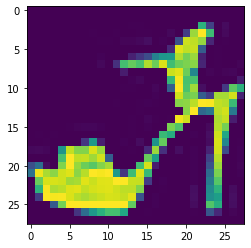

In [8]:
image = xtrain[imgIndex]
print('Image Label: ', ytrain[imgIndex])
plt.imshow(image)

In [9]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [10]:
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation='relu'),
                                 keras.layers.Dense(100, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')
                                 ])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7466 - accuracy: 0.7576 - val_loss: 0.5227 - val_accuracy: 0.8188
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4998 - accuracy: 0.8243 - val_loss: 0.4795 - val_accuracy: 0.8398
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4529 - accuracy: 0.8410 - val_loss: 0.4310 - val_accuracy: 0.8562
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4242 - accuracy: 0.8517 - val_loss: 0.4495 - val_accuracy: 0.8372
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4049 - accuracy: 0.8577 - val_loss: 0.3986 - val_accuracy: 0.8640
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3876 - accuracy: 0.8637 - val_loss: 0.3803 - val_accuracy: 0.8632
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3722 - accuracy: 0.8694 - val_loss: 0.3644 - val_accuracy:

In [14]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [3.6541216e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [15]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]
